<a href="https://colab.research.google.com/github/RavinduP/Product_Success/blob/Production_Yield/DSGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Dataset Shape: (2535, 10)

Training Set Performance:
Training Accuracy: 0.9793
Training ROC-AUC: 1.0000

Cross-Validation ROC-AUC Scores: [1. 1. 1. 1. 1.]
Mean ROC-AUC Score: 1.0000
Standard Deviation of ROC-AUC: 0.0000

Test Set Performance:
Test Accuracy: 0.9684
Test ROC-AUC: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       262
           1       1.00      0.93      0.97       245

    accuracy                           0.97       507
   macro avg       0.97      0.97      0.97       507
weighted avg       0.97      0.97      0.97       507



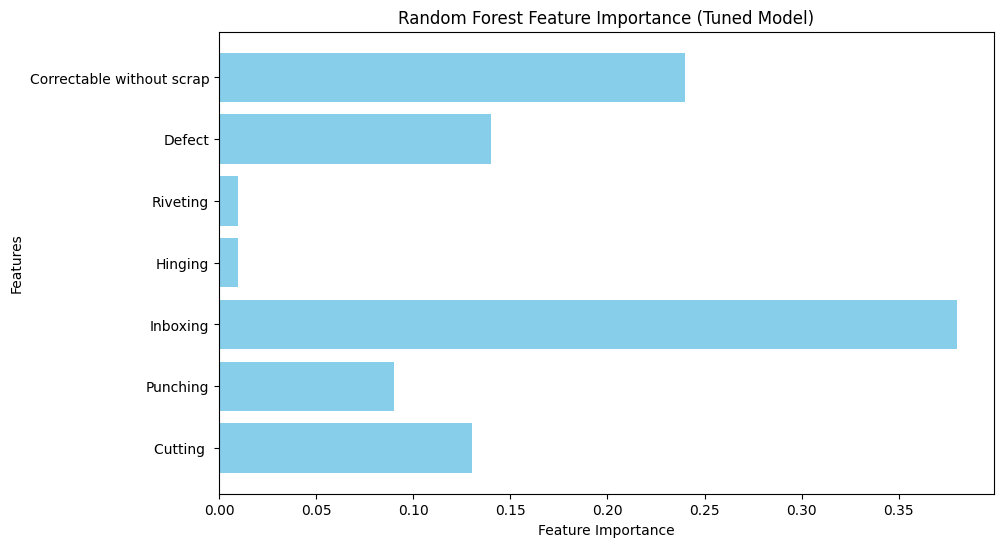

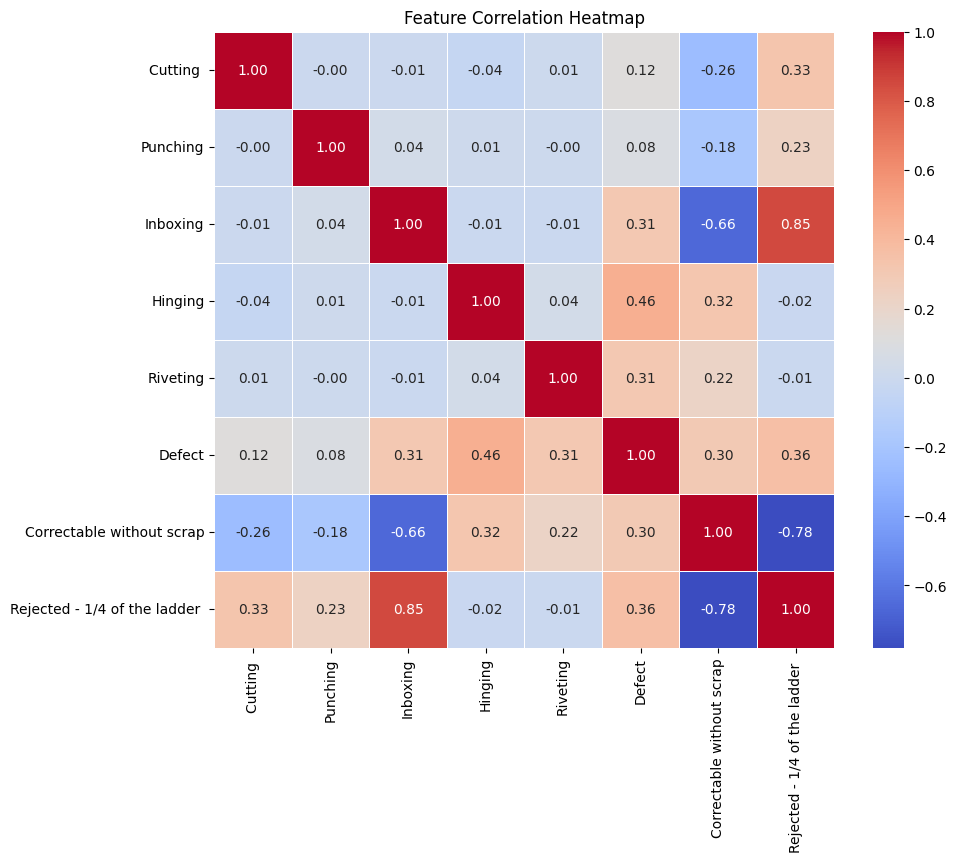

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Load the dataset
df = pd.read_excel("/content/drive/MyDrive/DSGP/Defects ladder.xlsx")
print(f"Initial Dataset Shape: {df.shape}")

# Drop missing values
df = df.dropna()
df = df.drop(columns=['Date', 'Product ID'])

# Define categorical and target columns
categorical_columns = ['Cutting', 'Punching', 'Inboxing', 'Hinging', 'Riveting', 'Defect', 'Correctable without scrap']
target_column = 'Rejected - 1/4 of the ladder '

# Features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Initialize a Random Forest Classifier with tuned hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=0,
    class_weight='balanced'
)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate on training set
y_train_pred = rf_model.predict(X_train)
y_train_pred_proba = rf_model.predict_proba(X_train)[:, 1]

print("\nTraining Set Performance:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Training ROC-AUC: {roc_auc_score(y_train, y_train_pred_proba):.4f}")

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='roc_auc')
print(f"\nCross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of ROC-AUC: {cv_scores.std():.4f}")

# Evaluate model on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("\nTest Set Performance:")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance visualization
importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance (Tuned Model)")
plt.show()

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Initial Dataset Shape: (2535, 10)
Mean ROC-AUC Score from Cross-Validation: 1.0000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:05:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Test Set Performance:
Accuracy: 1.0000
ROC-AUC: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       1.00      1.00      1.00       245

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507



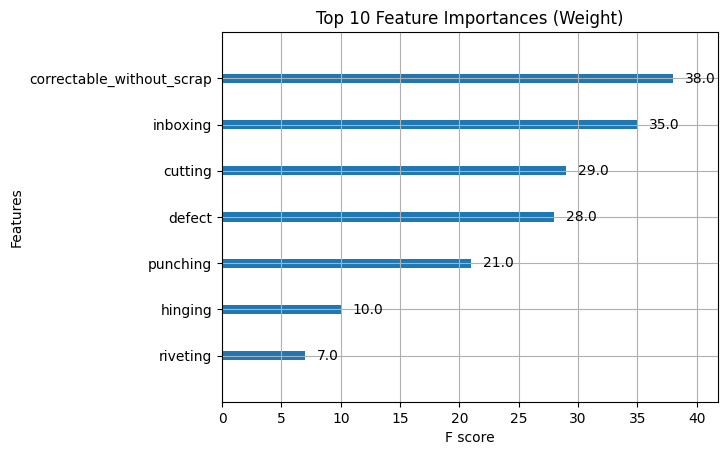

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Load the dataset
df = pd.read_excel("/content/drive/MyDrive/DSGP/Defects ladder.xlsx")
print(f"Initial Dataset Shape: {df.shape}")

# Clean column names (strip spaces, lowercase, and replace spaces with underscores)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Drop missing values and unnecessary columns
df = df.dropna()
df = df.drop(columns=['date', 'product_id'])

# Define categorical and target columns
categorical_columns = ['cutting', 'punching', 'inboxing', 'hinging', 'riveting', 'defect', 'correctable_without_scrap']
target_column = 'rejected_-_1/4_of_the_ladder'

# Encode categorical features using LabelEncoder
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Prepare the DMatrix for XGBoost
dtrain = xgb.DMatrix(X, label=y)

# Specify XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 10,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 1,
    'reg_alpha': 1,
    'reg_lambda': 1,
    'random_state': 0
}

# Perform cross-validation using XGBoost's built-in cv
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=5,
    stratified=True,
    metrics=['auc'],
    seed=0
)

print(f"Mean ROC-AUC Score from Cross-Validation: {cv_results['test-auc-mean'].iloc[-1]:.4f}")

# Train-test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Train the model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    reg_alpha=1,
    reg_lambda=1,
    random_state=0,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Feature Importance Visualization
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title("Top 10 Feature Importances (Weight)")
plt.show()
